In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
data = pd.read_csv("Student Mental health.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
data.shape

(101, 11)

In [5]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 
                'Year of Study', 'CGPA', 'Marital Status', 
                'Depression', 'Anxiety', 'Panic Attack', 'Treatment']
data.head()

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
# No need for the timestamp column, a few hour difference has insignificant impact
data.drop("Timestamp",axis=1,inplace=True)

In [7]:
# checking missing data
data.isnull().sum()

Gender            0
Age               1
Course            0
Year of Study     0
CGPA              0
Marital Status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

In [8]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [9]:
data.isna().sum()


Gender            0
Age               1
Course            0
Year of Study     0
CGPA              0
Marital Status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
dtype: int64

In [10]:
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [12]:
#since multiple entries of the same courses exist
#yet only differ in lettercase

course_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}
data['Course'] = data['Course'].str.lower().str.strip().map(course_mapping)
data.Course.unique()

array(['Engineering', 'Islamic Education', 'BIT', nan, 'BCS',
       'Human Resources', 'IRKHS', 'Psychology', 'KENMS', 'Accounting',
       'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', 'KIRKHS', 'Usuluddin', 'TAASL', 'ALA',
       'Biomedical Science', 'BENL', 'IT', 'CTS', 'MHSC', 'MALCOM', 'KOP',
       'Human Sciences', 'Biotechnology', 'Communication',
       'Diploma Nursing', 'Radiography', 'Fiqh Fatwa', 'Diploma TESL',
       'Fiqh', 'Nursing'], dtype=object)

Text(0.5, 1.0, 'Gender Distribution')

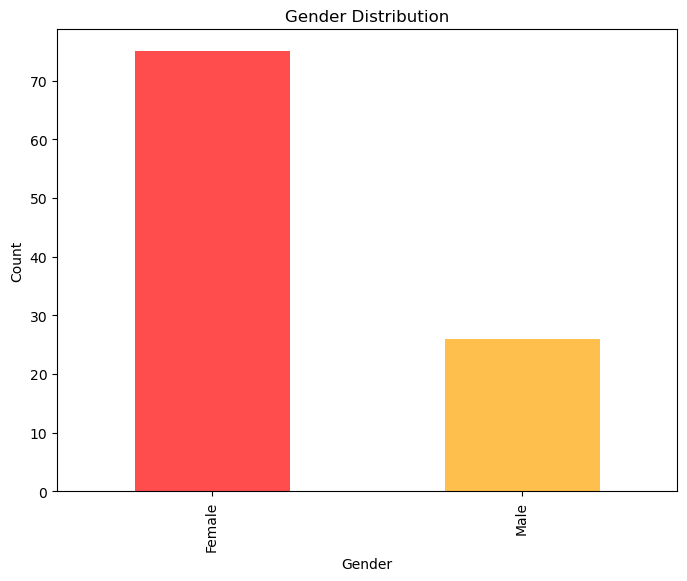

In [13]:
#Gender Distribution
gender_counts = data['Gender'].value_counts()

#Plotting a bar chart
plt.figure(figsize=(8,6))
gender_counts.plot(kind='bar', color=['red', 'orange'], alpha = 0.7)

#Addign labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')



In the Gender distribution bar chart can be observed a vaste majority of women affected by depression between years 18-24. 

Text(0.5, 1.0, 'Age Distribution')

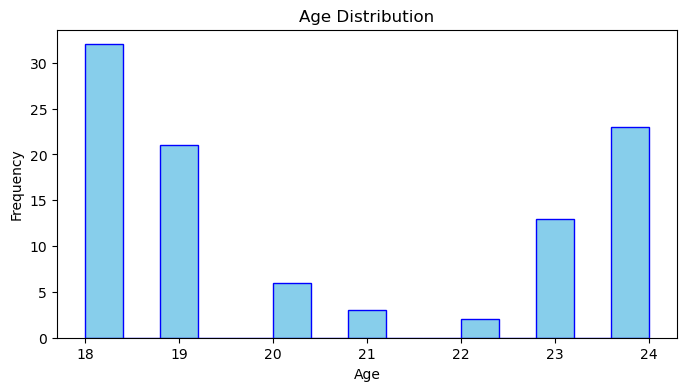

In [14]:
# Plotting a histogram for age distribution
plt.figure(figsize=(8,4))
plt.hist(data['Age'], bins = 15, color = 'skyblue', edgecolor ='blue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')


In the Age Distribution histogram can be observed a majority of 18-years-old students affected by depression. This can be attributable to first-year college students being homesick or struggling to make friends. 

<Axes: >

<Figure size 800x400 with 0 Axes>

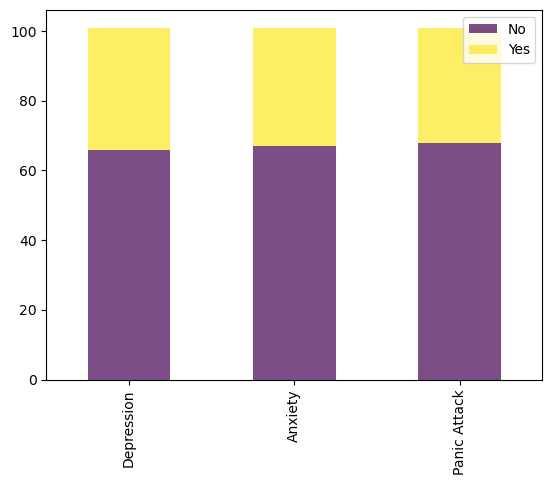

In [15]:
# Create a DataFrame with counts for each mental health condition
mental_health_issues = data[['Depression', 'Anxiety', 'Panic Attack']].apply(pd.Series.value_counts).transpose()

#plotting bar chart
plt.figure(figsize=(8,4))
mental_health_issues.plot(kind = 'bar', stacked=True, colormap='viridis', alpha = 0.7)

Text(0.5, 1.0, 'Percentage of individuals who sought specialist treatment')

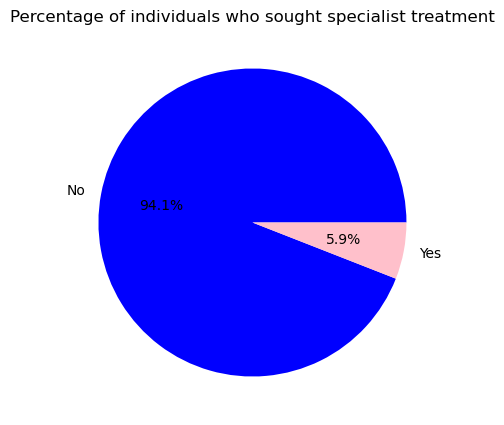

In [16]:
#Percentage of individuals who sought specialist treatment using a pie chart. 
treatment_counts = data['Treatment'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])

plt.title('Percentage of individuals who sought specialist treatment')


In [17]:
data.head()


,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,NaN,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,NaN,year 4,3.00 - 3.49,No,No,No,No,No


In [18]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [19]:
data['CGPA'] = data['CGPA'].replace('3.50 - 4.00 ', '3.50 - 4.00')
data['CGPA'].value_counts()



CGPA
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

<Axes: xlabel='CGPA'>

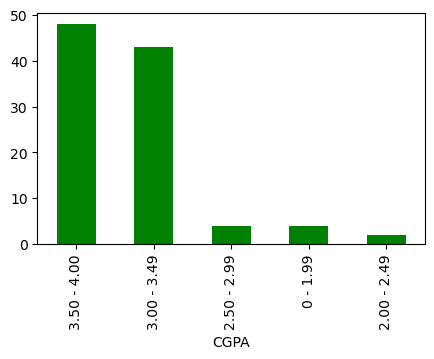

In [20]:
data['CGPA'].value_counts().plot(kind='bar', color='green', figsize=(5,3))

CGPA distribution of students bar plot clearly highlights how students affected from depression are often great at academics. This could suggest a correlation between education and depression. 

In [21]:
data['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [22]:
data['Year of Study'] = data['Year of Study'].replace('year 1', 'Year 1')
data['Year of Study'] = data['Year of Study'].replace('year 2', 'Year 2')
data['Year of Study'] = data['Year of Study'].replace('year 3', 'Year 3')

In [23]:
data['Year of Study'].value_counts()

Year of Study
Year 1    43
Year 2    26
Year 3    24
year 4     8
Name: count, dtype: int64

<Axes: xlabel='Year of Study'>

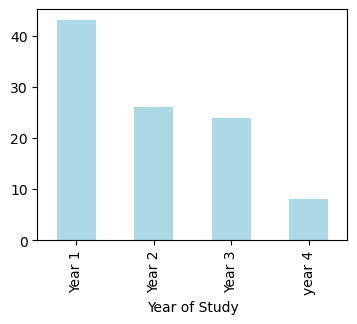

In [24]:
data['Year of Study'].value_counts().plot(kind='bar', color = 'lightblue', figsize=(4,3))

The Year of Study bar plot clearly points out that Year 1 of college has the majority of depressio cases. This could be atrributable to home sickness, new enviroment, adjustments...

<Axes: xlabel='Course'>

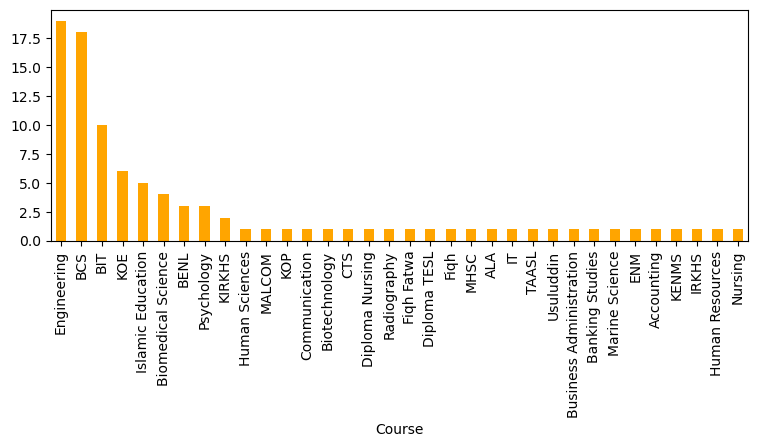

In [25]:
data['Course'].value_counts().plot(kind='bar', color = 'orange', figsize=(9,3))

The Course Bar plot cleary points out a concentration of depression cases among Engineering, Computer Science (BCS) and Informational Technology (BIF) students. The reason is still to understand. 

<Axes: ylabel='count'>

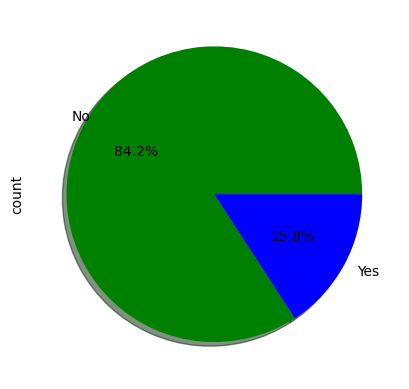

In [26]:
data['Marital Status'].value_counts().plot(kind='pie', radius=1, center= (3,3), autopct='%1.1f%%', shadow=True, colors=(['green', 'blue']))

It is seems to not be a big correlation between marital status and depression.

81